In [ ]:
#import libraries

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#import training csv file.

In [ ]:
data = pd.read_csv('/Users/lakshikajain/Documents/GitHub/DataScienceCapstone_2/Training.csv')
print(data.head()) 

In [ ]:
#list columns

In [40]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
#drop column unnamed:133 as it is NaNs

In [42]:
data_clean = data.drop(columns = ['Unnamed: 133'])

In [ ]:
#identify if there are any missing values in the dataset

In [43]:
missing_values = data_clean.isnull().sum()

In [44]:
print(missing_values)

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [45]:
data_clean.select_dtypes(include = 'object')

,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [ ]:
#convert prognosis column to Category type

In [46]:
data_clean['prognosis'] = data_clean['prognosis'].astype('category')

In [47]:
data_clean['prognosis'].value_counts()

prognosis
(vertigo) Paroymsal  Positional Vertigo    120
Hepatitis D                                120
Hypertension                               120
Hyperthyroidism                            120
Hypoglycemia                               120
Hypothyroidism                             120
Impetigo                                   120
Jaundice                                   120
Malaria                                    120
Migraine                                   120
Osteoarthristis                            120
Paralysis (brain hemorrhage)               120
Peptic ulcer diseae                        120
Pneumonia                                  120
Psoriasis                                  120
Tuberculosis                               120
Typhoid                                    120
Urinary tract infection                    120
Varicose veins                             120
Hepatitis E                                120
Hepatitis C                                120
AID

In [48]:
data_clean['prognosis'].nunique()

41

In [49]:
data_clean.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply normalization to all columns except for the target variable
features = data_clean.drop(columns=['prognosis'])
normalized_features = scaler.fit_transform(features)

# Convert normalized features back to a DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=features.columns)

# Include the target variable in the normalized dataset
normalized_data = pd.concat([normalized_features_df, data_clean[['prognosis']]], axis=1)


In [52]:
print(normalized_data)

       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0     2.501327   2.293369              6.674995             -0.21738   
1    -0.399788   2.293369              6.674995             -0.21738   
2     2.501327  -0.436040              6.674995             -0.21738   
3     2.501327   2.293369             -0.149813             -0.21738   
4     2.501327   2.293369              6.674995             -0.21738   
...        ...        ...                   ...                  ...   
4915 -0.399788  -0.436040             -0.149813             -0.21738   
4916 -0.399788   2.293369             -0.149813             -0.21738   
4917 -0.399788  -0.436040             -0.149813             -0.21738   
4918 -0.399788   2.293369             -0.149813             -0.21738   
4919 -0.399788   2.293369             -0.149813             -0.21738   

      shivering    chills  joint_pain  stomach_pain  acidity  \
0     -0.149813 -0.439995   -0.401837      -0.21738 -0.21738   
1     -

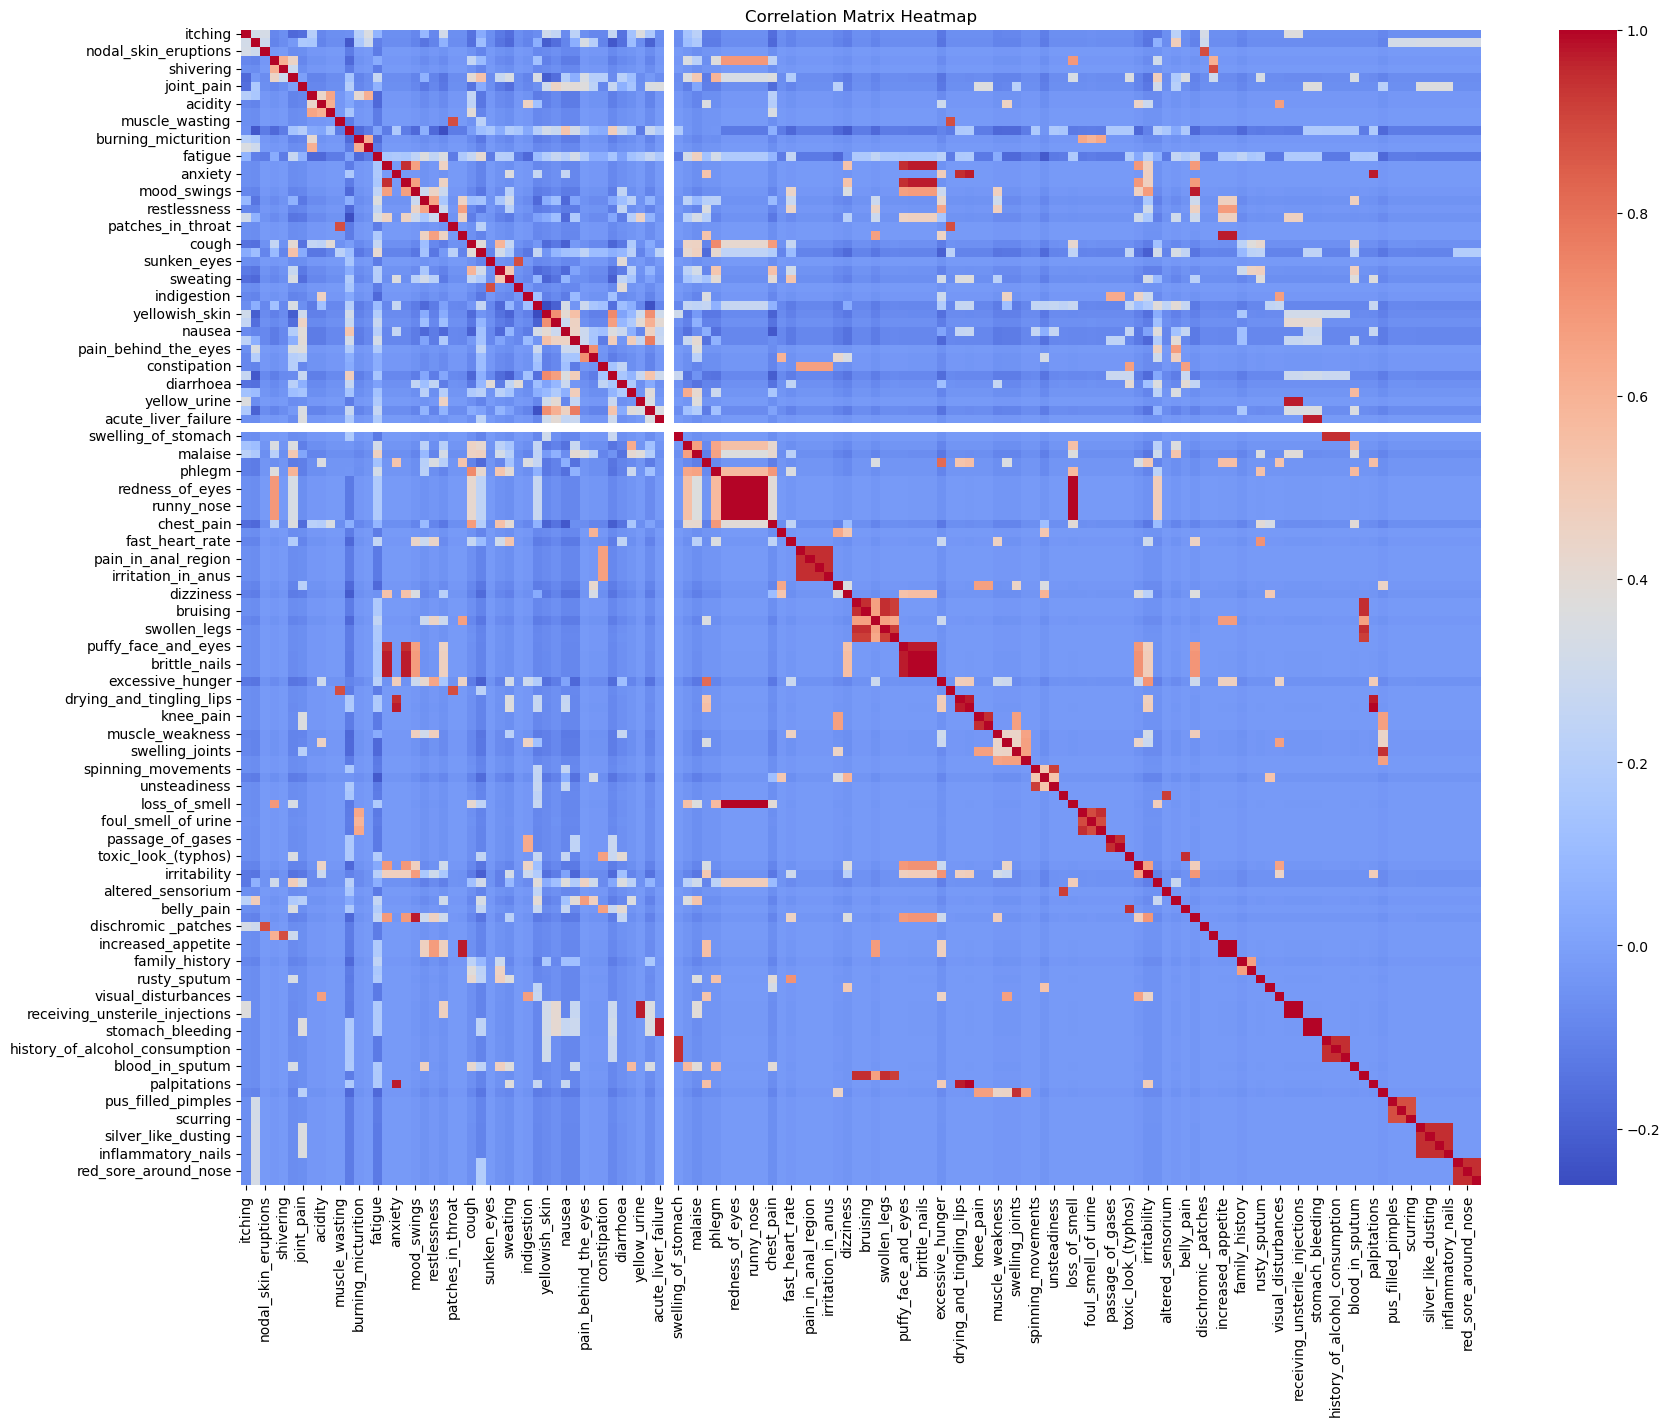

In [55]:
correlation_features = data_clean.drop(columns=['prognosis'])

# Calculate the correlation matrix
correlation_matrix = correlation_features.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

